#Imports

In [6]:
!pip install scikit-plot -q

In [7]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scikitplot as skplt
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [8]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Functions

In [9]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)

    print(f"{model_name} - Train accuracy score: {train_accuracy}")
    print(f"{model_name} - Test accuracy score: {test_accuracy}")

    train_conf_matrix = confusion_matrix(y_train, train_predictions)
    test_conf_matrix = confusion_matrix(y_test, test_predictions)


    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    skplt.metrics.plot_confusion_matrix(y_train, train_predictions,
                                        title=f'{model_name} - Train Confusion Matrix',
                                        text_fontsize='large', cmap='Blues', ax=axes[0])

    skplt.metrics.plot_confusion_matrix(y_test, test_predictions,
                                        title=f'{model_name} - Test Confusion Matrix',
                                        text_fontsize='large', cmap='Blues', ax=axes[1])

    plt.tight_layout()
    plt.show()

def prepare_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

def preprocess_text_trump(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return ' '.join(tokens)

# Wszystkie

##Data preparation

statementState
TRUE            1761
FALSE            648
MISLEADING       313
UNVERIFIABLE     113
Name: count, dtype: int64


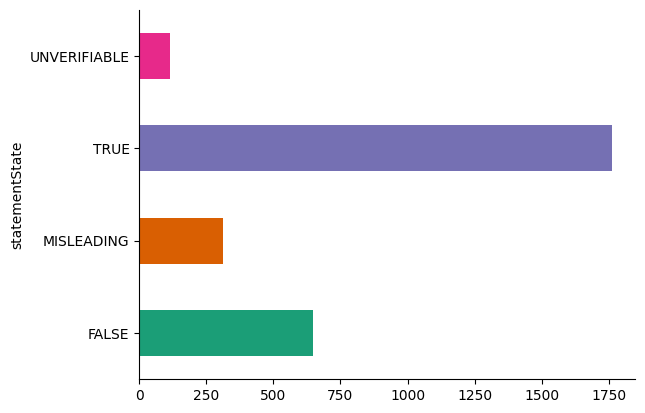

In [10]:
file_path = 'dataset.csv'
df = pd.read_csv(file_path)
df = df.drop(columns=['politicianID','name','party','statementID','statementExplanClean','statementExplan'])
df.groupby('statementState').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
value_counts = df['statementState'].value_counts()
print(value_counts)

In [11]:
def prepare_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['statementText']=df['statementText'].apply(prepare_text)

label_mapping = {
    'FALSE': 0,
    'TRUE': 1,
    'MISLEADING' : 2,
    'UNVERIFIABLE' : 3
}
df['statementState'] = df['statementState'].map(label_mapping)
X = df['statementText'].values
y = df['statementState'].values



In [12]:
print(X[0])

pamiętamy że w latach 20062007 kiedy rządziło pis dynamika pkb znacznie przekraczała 5 proc a w drugim roku 6 proc


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorization = TfidfVectorizer()
X_train_transformed = vectorization.fit_transform(X_train)
X_test_transformed = vectorization.transform(X_test)

In [14]:
print(X_train_transformed[0])

  (0, 963)	0.3985742505570202
  (0, 9781)	0.30968280522093944
  (0, 2860)	0.19503694285481935
  (0, 8917)	0.25657685776096695
  (0, 4685)	0.12405582455847959
  (0, 8007)	0.3985742505570202
  (0, 3605)	0.19422362529152357
  (0, 5725)	0.24522373895482183
  (0, 8838)	0.35575549379354615
  (0, 2108)	0.2201070557908177
  (0, 9376)	0.2258655424868024
  (0, 3248)	0.37845861555573673


##Models

Logistic Regression - Train accuracy score: 0.7001763668430335
Logistic Regression - Test accuracy score: 0.6067019400352733


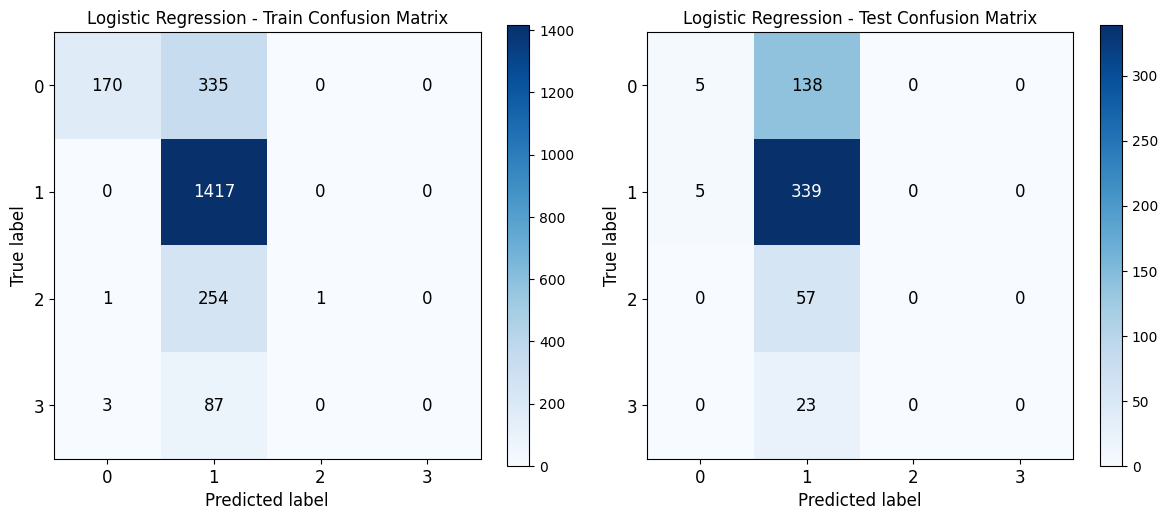

Random Forest - Train accuracy score: 0.9982363315696648
Random Forest - Test accuracy score: 0.599647266313933


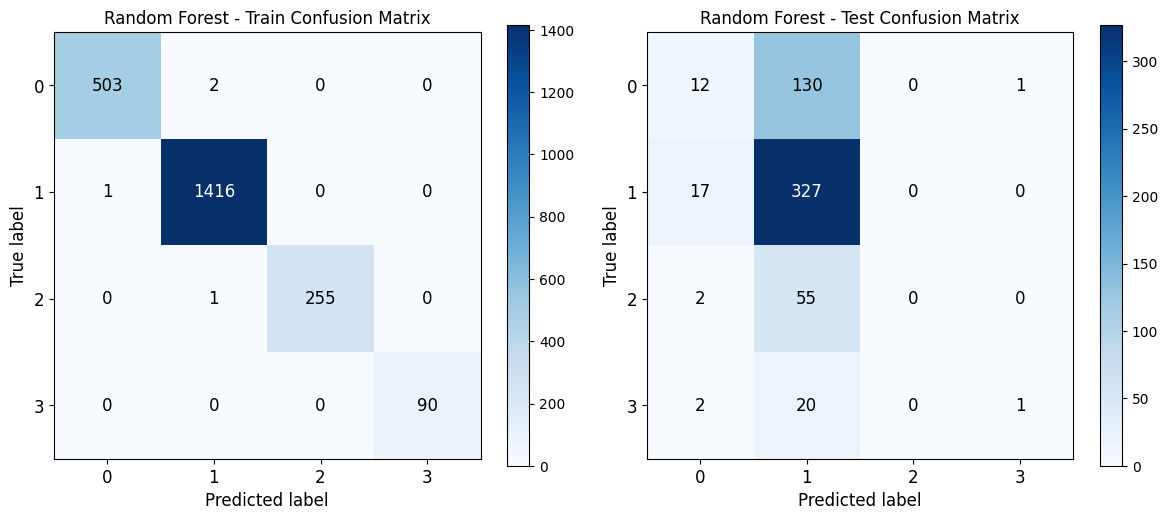

SVC with Linear Kernel - Train accuracy score: 0.814373897707231
SVC with Linear Kernel - Test accuracy score: 0.6137566137566137


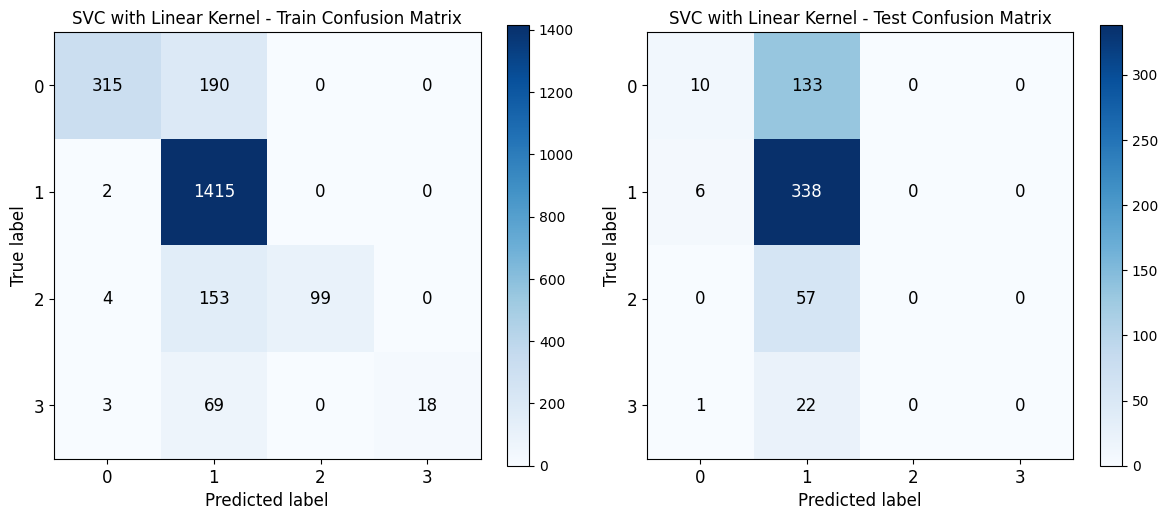

In [15]:
models = [
    (LogisticRegression(), 'Logistic Regression'),
    (RandomForestClassifier(), 'Random Forest'),
    (SVC(kernel="linear"), 'SVC with Linear Kernel')
]

for model, name in models:
    train_evaluate_model(model, X_train_transformed, y_train, X_test_transformed, y_test, name)

# Tylko true false


## Data preparation

statementState
TRUE     1761
FALSE     648
Name: count, dtype: int64


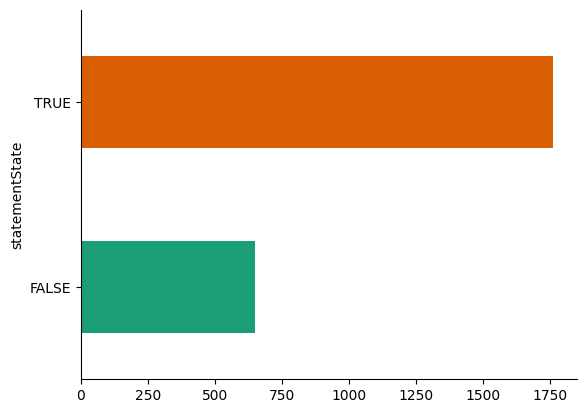

In [16]:
dataset2 = 'dataset.csv'
df2 = pd.read_csv(dataset2)
df2 = df2.drop(columns=['politicianID','name','party','statementID','statementExplanClean','statementExplan'])
df2 = df2[~df2['statementState'].isin(['MISLEADING', 'UNVERIFIABLE'])]
df2.groupby('statementState').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
value_counts = df2['statementState'].value_counts()
print(value_counts)

In [17]:
def prepare_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df2['statementText']=df2['statementText'].apply(prepare_text)

label_mapping = {
    'FALSE': 0,
    'TRUE': 1
}
df2['statementState'] = df2['statementState'].map(label_mapping)
X = df2['statementText'].values
y = df2['statementState'].values


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorization = TfidfVectorizer()
X_train_transformed = vectorization.fit_transform(X_train)
X_test_transformed = vectorization.transform(X_test)

## Models

Logistic Regression - Train accuracy score: 0.7498702646600934
Logistic Regression - Test accuracy score: 0.6991701244813278


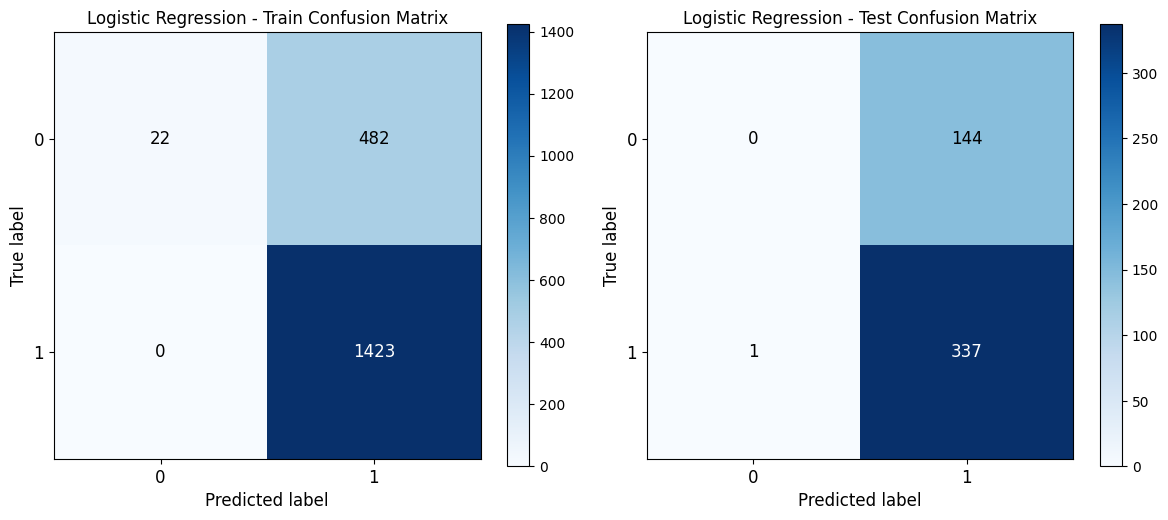

Random Forest - Train accuracy score: 0.9989621172807472
Random Forest - Test accuracy score: 0.6804979253112033


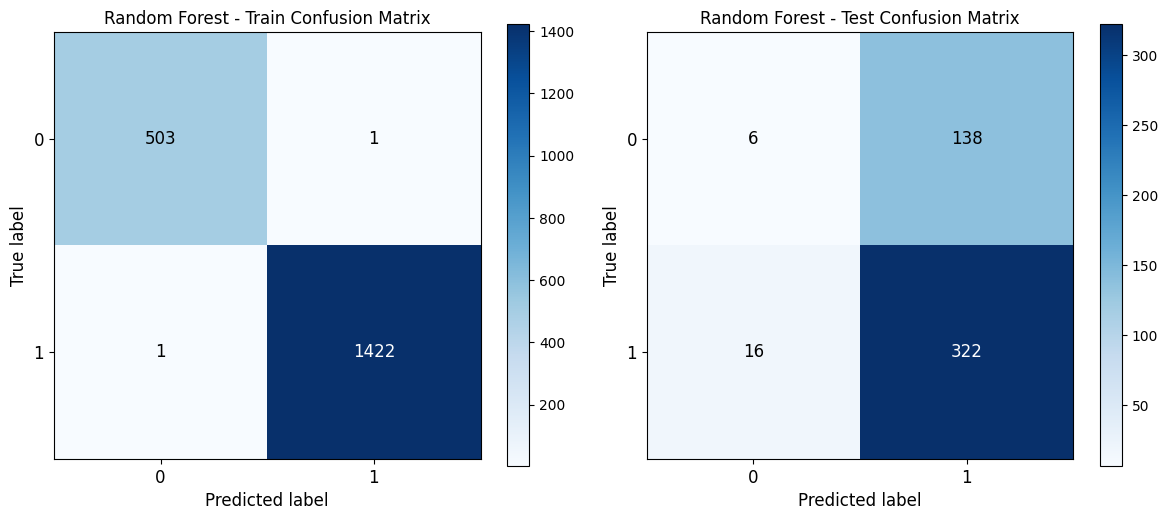

SVC with Linear Kernel - Train accuracy score: 0.8962117280747276
SVC with Linear Kernel - Test accuracy score: 0.7053941908713693


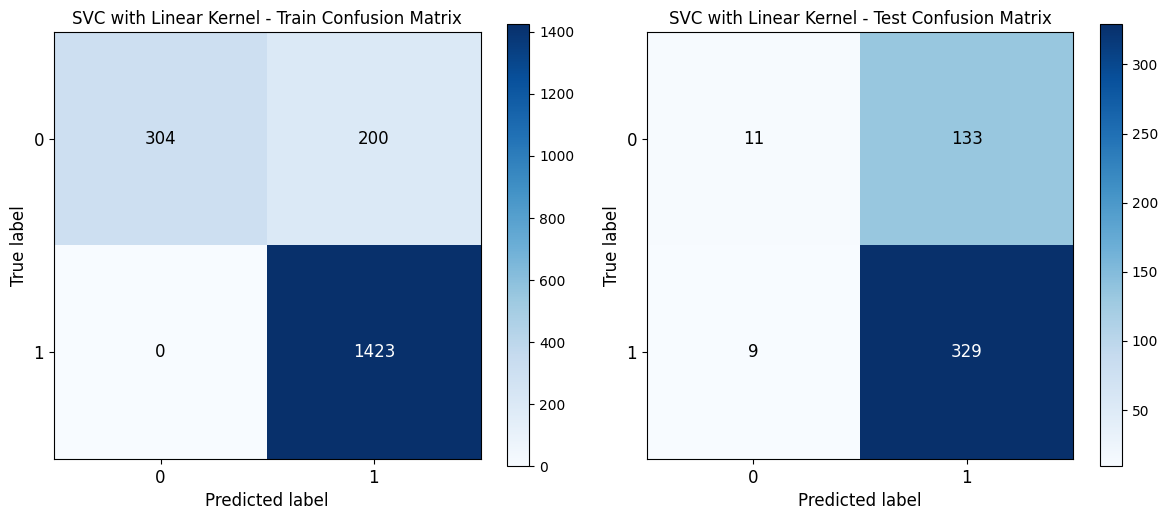

In [19]:
models = [
    (LogisticRegression(), 'Logistic Regression'),
    (RandomForestClassifier(), 'Random Forest'),
    (SVC(kernel="linear"), 'SVC with Linear Kernel')
]

for model, name in models:
    train_evaluate_model(model, X_train_transformed, y_train, X_test_transformed, y_test, name)

# Trump


## Data preparation

In [25]:
dataset3 = 'fake_and_real_news.csv'
df3 = pd.read_csv(dataset3)

label
Fake    5000
Real    4900
Name: count, dtype: int64


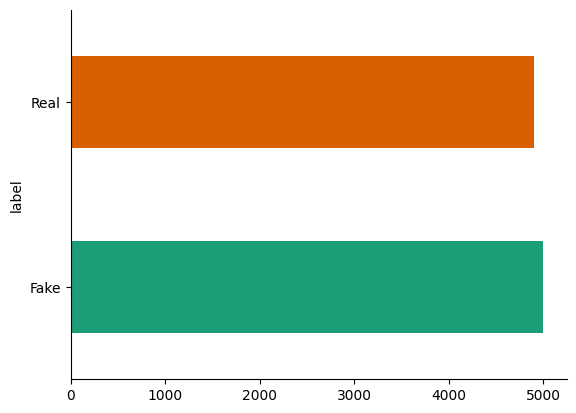

In [28]:
df3.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
value_counts = df3['label'].value_counts()
print(value_counts)

In [21]:
df3['Text'] =df3['Text'].apply(preprocess_text_trump)


In [22]:
label_mapping = {
    'Fake': 0,
    'Real': 1
}
df3['label'] = df3['label'].map(label_mapping)
X = df3['Text'].values
y = df3['label'].values


print(X[0])

top trump surrogate brutally stabs back pathetic video looking though republican presidential candidate donald trump losing support even within ranks know things getting bad even top surrogates start turning exactly happened fox news newt gingrich called trump pathetic gingrich knows trump needs keep focus hillary clinton even remotely wants chance defeating however trump hurt feelings many republicans support sexual assault women turned including house speaker paul ryan made trump lash said fox news look first let say trump admire tried help much big trump little trump little trump frankly pathetic mean mad getting phone call trump referring fact paul ryan call congratulate debate probably win despite trump ego tells also added donald trump one opponent name hillary clinton name paul ryan anybody else trump seem realize person mad truly worst enemy ultimately lead defeat one blame via politico featured photo joe images


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorization = TfidfVectorizer()
X_train_transformed = vectorization.fit_transform(X_train)
X_test_transformed = vectorization.transform(X_test)

## Models

Logistic Regression - Train accuracy score: 0.9946969696969697
Logistic Regression - Test accuracy score: 0.9929292929292929


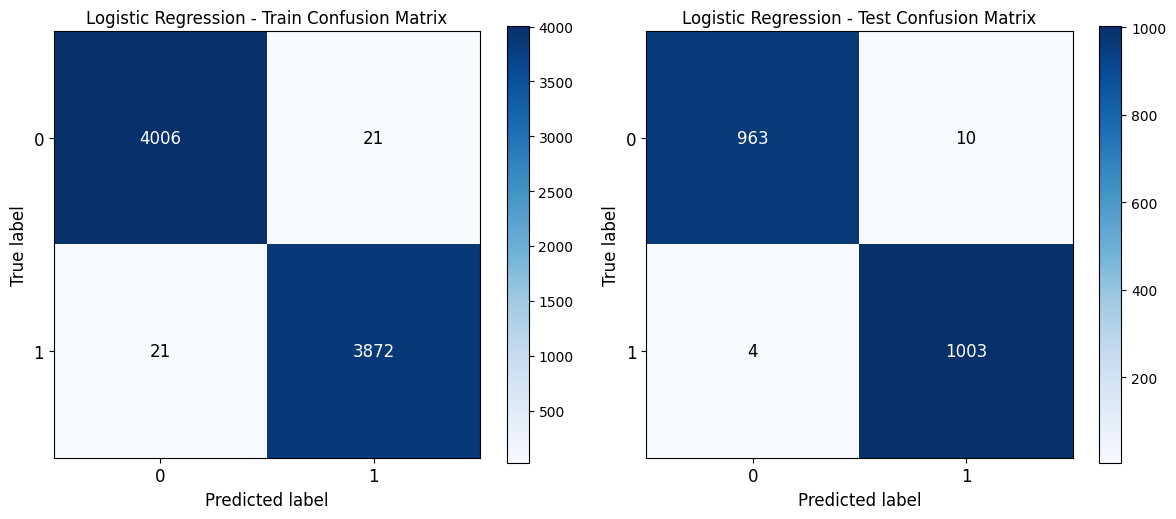

Random Forest - Train accuracy score: 1.0
Random Forest - Test accuracy score: 0.9949494949494949


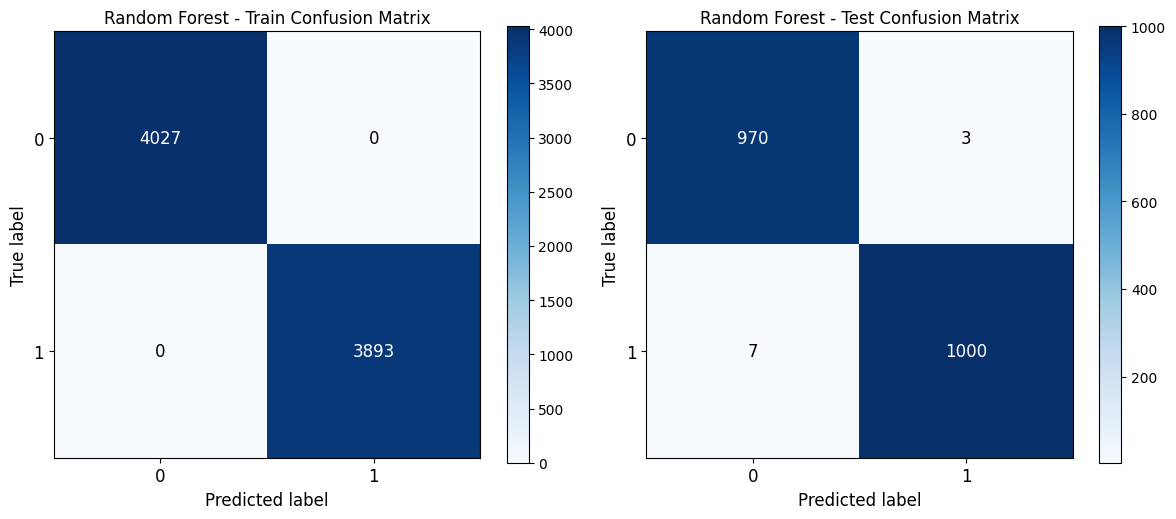

SVC with Linear Kernel - Train accuracy score: 0.9996212121212121
SVC with Linear Kernel - Test accuracy score: 0.9959595959595959


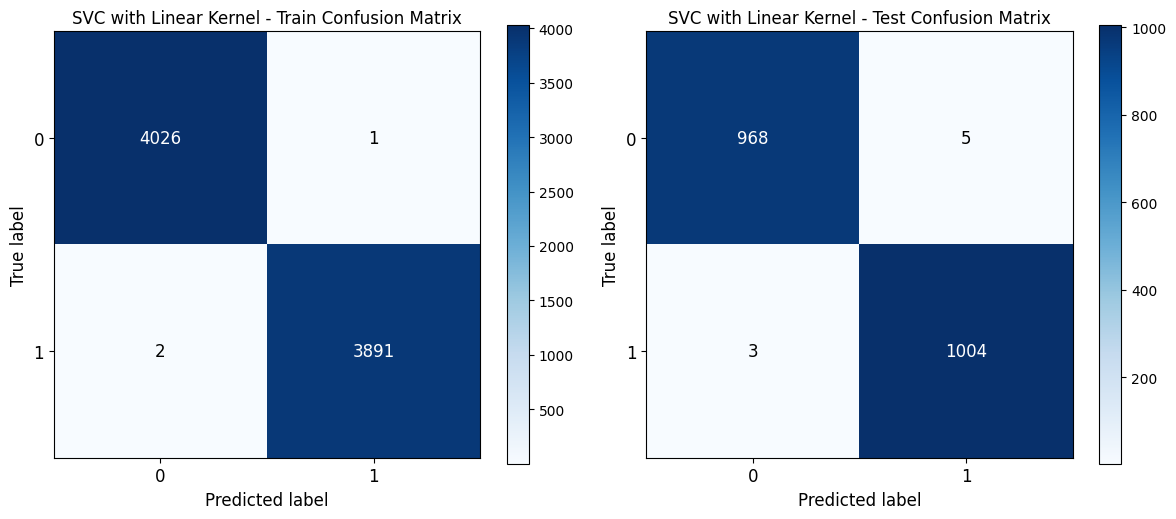

In [24]:
models = [
    (LogisticRegression(), 'Logistic Regression'),
    (RandomForestClassifier(), 'Random Forest'),
    (SVC(kernel="linear"), 'SVC with Linear Kernel')
]

for model, name in models:
    train_evaluate_model(model, X_train_transformed, y_train, X_test_transformed, y_test, name)